In [165]:
import rosbag
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import tf
import seaborn as sns

In [166]:
bag = rosbag.Bag('/home/uware/rosbags/d_l_all_2022-03-01-10-35-52.bag')

# create variables
target = 'is_detected'

# in meters per second ( walking speed is about 1.4m/s )
# velocity = 1.4

In [167]:
topic = '/tag_detections'

rows = []

for topic, msg, t in bag.read_messages(topics=topic):
    time = t

    # we only care if there is or there isn't a detection, =0 or >0, and take the first detection for the moment
    is_detected = len(msg.detections)

    # detection distances only for information, it is not being used for anything
    detection_distance = msg.detections[0].pose.pose.pose.position.z if is_detected>0 else None

    # create row
    row={'time': time.to_sec(), target: is_detected, 'detection_distance': detection_distance}
    rows.append(row)

df = pd.DataFrame.from_records(rows)

In [168]:
# calculate relative time in seconds instead of absolute time
df['relative_time'] =  df.loc[0:, 'time'] - df.at[0, 'time']
df = df.drop(columns=['time'])
df.groupby(target).head(3)

,is_detected,detection_distance,relative_time
0,0,NaN,0.000000
1,0,NaN,0.321184
2,0,NaN,0.573977
35,1,1.150682,7.187892
36,1,1.142857,7.382724
55,1,1.109309,11.117009


In [169]:
# ratio of detected to not
ratios = df.is_detected.value_counts(normalize=True)*100
ratios

0    51.800379
1    48.199621
Name: is_detected, dtype: float64

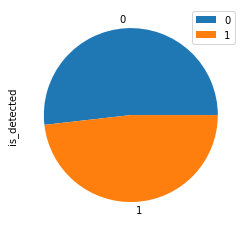

In [170]:
ratios.plot.pie()
plt.legend()

In [172]:
df.head(5)

,is_detected,detection_distance,relative_time
0,0,NaN,0.000000
1,0,NaN,0.321184
2,0,NaN,0.573977
3,0,NaN,0.827620
4,0,NaN,1.043618


/home/uware/projects/apriltags_ws/src/test_pipeline/env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/uware/projects/apriltags_ws/src/test_pipeline/env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 9.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


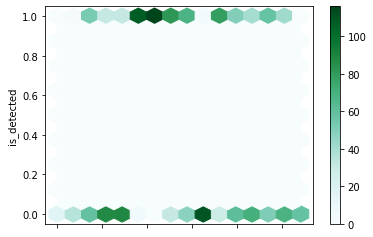

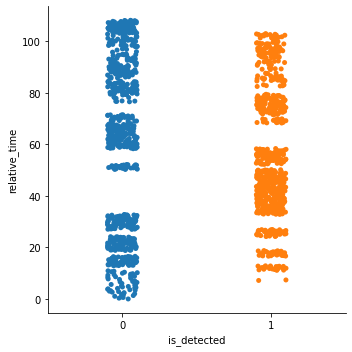

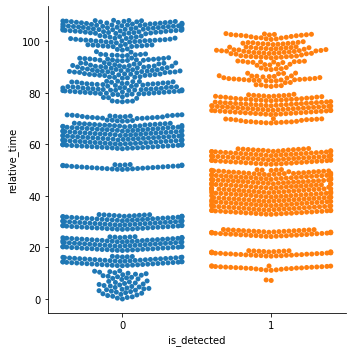

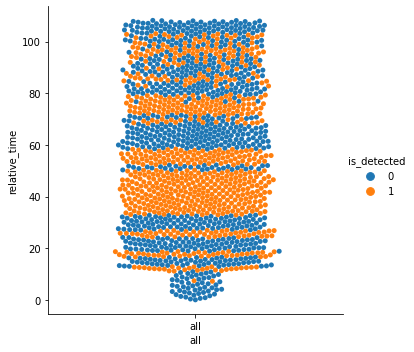

In [178]:
df.plot.hexbin(x="relative_time", y=target, gridsize=15)
sns.catplot(x=target, y='relative_time', data=df)
sns.catplot(x=target, y='relative_time', data=df, kind="swarm")

# creating a dummy column for plotting both classes together
df.loc[:,'all'] = 'all'
sns.catplot(x='all', y='relative_time', data=df, hue=target, kind="swarm")